## Data Cleaning and Preprocessing

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
dataset = pd.read_excel("zomato_data.xlsx", engine='openpyxl')
print(dataset.head(2))

   Order ID  Order Amount (INR)  Delivery Time (mins) Order Date  Rating  \
0         1                1930                    32 2023-04-30     4.6   
1         2                 371                    84 2023-01-06     2.7   

   Number of Items  Delivery Distance (km)  Delivery Agent ID Order Status  \
0                9                9.200017                995    Cancelled   
1                1                8.175074                941    Cancelled   

  Payment Method  ...  average_cost_for_two price_range  \
0     Debit Card  ...                   200           1   
1            UPI  ...                  1000           3   

                                          highlights  aggregate_rating votes  \
0  ['Credit Card', 'Delivery', 'Takeaway Availabl...               0.0     3   
1  ['Cash', 'Takeaway Available', 'Breakfast', 'N...               3.6    32   

  photo_count opentable_support delivery          state    area  
0           0               0.0        0         Ke

## Checking for null values

In [40]:
print(dataset.isnull().sum())

Order ID                    0
Order Amount (INR)          0
Delivery Time (mins)        0
Order Date                  0
Rating                      0
Number of Items             0
Delivery Distance (km)      0
Delivery Agent ID           0
Order Status                0
Payment Method              0
Tip Amount (INR)            0
Promo Code Applied          0
Has Free Delivery           0
res_id                      0
name                        0
type                      341
address                     5
city                        0
locality                    0
latitude                    0
longitude                   0
cuisines                   75
timings                   176
average_cost_for_two        0
price_range                 0
highlights                  0
aggregate_rating            0
votes                       0
photo_count                 0
opentable_support           8
delivery                    0
state                       0
area                        0
dtype: int

## Treating the null values as per their datatype

In [41]:
# Check percentage of missing values
null_values_Percentage = dataset.isnull().mean() * 100
print(null_values_Percentage.sort_values(ascending=False))

type                      2.823081
timings                   1.457074
cuisines                  0.620912
opentable_support         0.066231
address                   0.041394
Order ID                  0.000000
Number of Items           0.000000
Order Amount (INR)        0.000000
Delivery Time (mins)      0.000000
Order Status              0.000000
Delivery Agent ID         0.000000
Payment Method            0.000000
Tip Amount (INR)          0.000000
Has Free Delivery         0.000000
Delivery Distance (km)    0.000000
Order Date                0.000000
Rating                    0.000000
res_id                    0.000000
name                      0.000000
Promo Code Applied        0.000000
city                      0.000000
longitude                 0.000000
latitude                  0.000000
average_cost_for_two      0.000000
locality                  0.000000
price_range               0.000000
highlights                0.000000
votes                     0.000000
aggregate_rating    

## Fill Categorical Columns using Mode and the numerical columns using mean or median.

### mode -->> gives us the most frequent values. 

In [42]:
# Fill missing values in categorical columns with mode
categorical_cols = ['type', 'timings', 'cuisines', 'address']

for col in categorical_cols:
    # take out the mode of each column
    most_frequent_value = dataset[col].mode()[0] # mode returns a series so pick the top one
    dataset[col] = dataset[col].fillna(most_frequent_value)

## treating the null values in the numerical column opentable_support 
This field consists all the value as 0 so directly mark as 0

In [43]:
dataset["opentable_support"] = dataset["opentable_support"].fillna(0)

print("Nulls after filling:")
print(dataset.isnull().sum())

Nulls after filling:
Order ID                  0
Order Amount (INR)        0
Delivery Time (mins)      0
Order Date                0
Rating                    0
Number of Items           0
Delivery Distance (km)    0
Delivery Agent ID         0
Order Status              0
Payment Method            0
Tip Amount (INR)          0
Promo Code Applied        0
Has Free Delivery         0
res_id                    0
name                      0
type                      0
address                   0
city                      0
locality                  0
latitude                  0
longitude                 0
cuisines                  0
timings                   0
average_cost_for_two      0
price_range               0
highlights                0
aggregate_rating          0
votes                     0
photo_count               0
opentable_support         0
delivery                  0
state                     0
area                      0
dtype: int64


## Checking for duplicate values in the dataset

In [44]:
# Checking for duplicates 
print("Duplicate rows",dataset.duplicated().sum())

# Remove duplicates (keep the first occurrence)
dataset = dataset.drop_duplicates()

# Confirm removal
print("After dropping, duplicate rows:", dataset.duplicated().sum())

Duplicate rows 216
After dropping, duplicate rows: 0


In [45]:
# Load the Excel file properly
dataset = pd.read_excel("zomato_data.xlsx", engine='openpyxl')  # include full file name

# Now check the info again
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                12079 non-null  int64         
 1   Order Amount (INR)      12079 non-null  int64         
 2   Delivery Time (mins)    12079 non-null  int64         
 3   Order Date              12079 non-null  datetime64[ns]
 4   Rating                  12079 non-null  float64       
 5   Number of Items         12079 non-null  int64         
 6   Delivery Distance (km)  12079 non-null  float64       
 7   Delivery Agent ID       12079 non-null  int64         
 8   Order Status            12079 non-null  object        
 9   Payment Method          12079 non-null  object        
 10  Tip Amount (INR)        12079 non-null  int64         
 11  Promo Code Applied      12079 non-null  object        
 12  Has Free Delivery       12079 non-null  object

In [46]:
print(dataset.shape)

(12079, 33)


## Casting all numeric columns to numeric by automatically detecting the numeric values

In [47]:
for col in dataset.select_dtypes(include="object").columns:
    try:
        temp_col = pd.to_numeric(dataset[col],errors="coerce")
        # check if the columns contains even a single value other than NAN.
        # If some non-NaN values exist after conversion, it's likely numeric
        if temp_col.notna().sum() > 0:
            dataset[col] = temp_col
            print(f"Converted the Column {col}")
        else:
            print(f"❌ Left as object (categorical): {col}")
    except:
        print(f"{col} is not eligible for conversion")

❌ Left as object (categorical): Order Status
❌ Left as object (categorical): Payment Method
❌ Left as object (categorical): Promo Code Applied
❌ Left as object (categorical): Has Free Delivery
❌ Left as object (categorical): name
❌ Left as object (categorical): type
❌ Left as object (categorical): address
❌ Left as object (categorical): city
❌ Left as object (categorical): locality
❌ Left as object (categorical): cuisines
❌ Left as object (categorical): timings
❌ Left as object (categorical): highlights
❌ Left as object (categorical): state


## Check for outliers

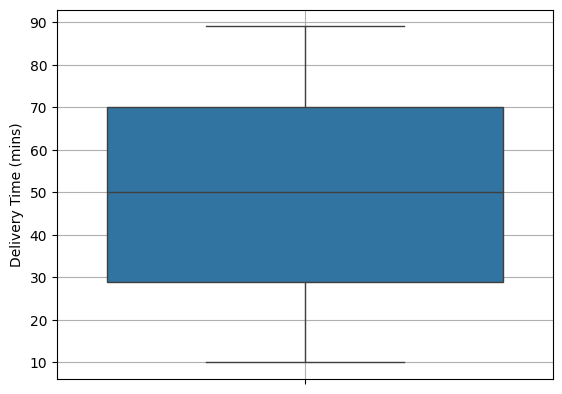

In [48]:
import seaborn as sns

sns.boxplot(dataset["Delivery Time (mins)"])
plt.grid(True)
plt.show()

# From the boxplot we can understand that the 
# Lower Whisker (within the range of Q1 - 1.5 * IQR) --> fastest delivery are under 10 minutes
# 25% (q1) of the orders are delivered within 30 minutes.
# 50% (median) of the orders are delivered within 50 minutes.
# 75% (q3) of the orders are delivered within 70 minutes.
# Upper whisker (within the range of Q3 + 1.5 + IQR) --> at 90 so the most delayed delivery was done under 90 minutes.
# Any data beyond the whiskers can be termed as outliers. 
# so IQR (interquartilerange = Q3 - Q1 , in this case == 70 - 30 = 40)

## Check for consistency in Categorical columns i.e object types
#### convert all of them into the lowercase values 

In [49]:
for col in dataset.select_dtypes(include="object").columns:
    dataset[col] = dataset[col].str.strip().str.lower()
print(dataset.columns)

Index(['Order ID', 'Order Amount (INR)', 'Delivery Time (mins)', 'Order Date',
       'Rating', 'Number of Items', 'Delivery Distance (km)',
       'Delivery Agent ID', 'Order Status', 'Payment Method',
       'Tip Amount (INR)', 'Promo Code Applied', 'Has Free Delivery', 'res_id',
       'name', 'type', 'address', 'city', 'locality', 'latitude', 'longitude',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'highlights', 'aggregate_rating', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'state', 'area'],
      dtype='object')


In [50]:
dataset.to_excel("cleaned_zomato_data.xlsx", index=False)
